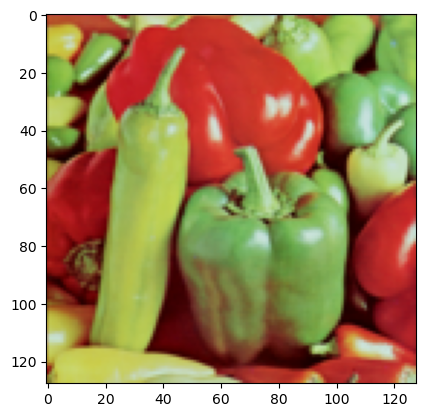

In [2]:
from matplotlib.image import imread 
import matplotlib.pyplot as plt;
import numpy as np
import os

load_path = os.path.join('..', 'data/')
comp_rate = 16

A_SMALL = imread(load_path + 'peppers-small.tiff')
plt.imshow(A_SMALL)

In [3]:
x = A_SMALL.reshape(-1, 3)
mu = x[np.random.choice(x.shape[0], comp_rate, replace = False)]

In [4]:
# K-Means implementation:

m = x.shape[0]
x = x.reshape((-1, 1, 3))

eps = 1e-3
max_iter = 30
it = 0
ll, prev_ll = None, None

while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
    
    norm = np.linalg.norm(x - mu.reshape((1, -1, 3)), axis = 2)
    c = np.argmin(norm, axis = 1)
    
    mu = np.sum((np.arange(comp_rate)[:, None] == c).reshape((comp_rate,-1, 1)) * x.reshape(1, -1, 3), axis = 1)
    mu = mu / np.sum((np.arange(comp_rate)[:, None] == c), axis = 1).reshape((comp_rate,1))
    
    ll = 1/m * np.sum(np.amin(norm, axis = 1))
    it += 1
    #print(it, ll)


In [5]:
# Compressing image according the clustering given by mu: 

A = imread(load_path + 'peppers-large.tiff')

norm = np.linalg.norm(A.reshape(512, 512, 1, 3) - mu.reshape((1, 1, -1, 3)), axis = 3)
c = np.argmin(norm, axis = 2)

A_comp = np.zeros((512, 512, 3))

for i in range(512):
    for j in range(512):
        A_comp[i, j, :] = mu[int(c[i, j])]
        
A_comp /= 255


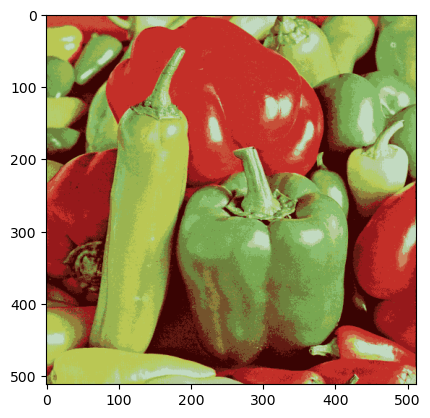

In [6]:
# Compressed image: 
plt.imshow(A_comp)